## Covid-19 Pandemic in India !!!
<img src="COVID_Intro.jpg" alt="Girl in a jacket" width="1000" height="20">

##About COVID-19

The **coronavirus (COVID-19)** pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily. The government is working to slow down its spread. The pandemic is driven by human to human transmission.

#Change this 
Till date it has spread across **215** countries infecting **5,491,194** people and killing **346,331** so far. In India, as many as **138,536** COVID-19 cases have been reported so far. Of these, **57,692** have recovered and **4,024** have died. 

**Why is Social Distancing so Important :**
- Let's say x got infected yesterday, but he won't know it untill next 14 days
- x thinks he/she is healthy, but he/she is capable of infecting 10 or more persons per day.
- Now, these 10 persons think they are completely healthy, they travel, go out and infect 100 others.
- These 100 persons think they are healthy but they have already infected 1000 persons.
- No one knows who is healthy and who is infected - unless a patient shows symptoms and is tested.
- Since, many Covid +tve patients are asymptomatic, all we can do is stay inside our homes. 
- Social Distancing is the only way to stop the spread.


<img src="COVID_Spread.png" width="1000">


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.

<img src="CoronaVirus Timeline.PNG" width="800">



Even though India had responded quickly, implementing a proactive, nationwide, lockdown, to flatten the curve and use the time to plan and resource responses adequately. But, once the Unlocking started, even though in phased manner, the numbers have spiked. And we will see the same through the numbers.
Globally, the Data Scientists are using AI and machine learning to analyze, predict, and take safety measures against COVID-19. Once the Data has been analysed we can also make Time-series Predictions Models on it.


## How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


### Goal of this notebook :
To explore the current COVID situation in India, an Anaysis of the current situation after suffering from the Pandemic for almost 6 Months.
### Tasks to be performed:
Step 1 : Scrape out the COVID-19 from websites - Collecting Data  
Step 2 : Data Cleaning  
Step 3 : Analyze the present condition in India through data
  - Figure out the death rate and cure rate per 100 across the affected States.
  - Create different charts to visualize the following: 
  - Age group distribution of affected patients
  - Total sample test done till date
  - Growth rate of COVID in Top 15 states
  - Top 10 States in each health facility
  - State wise testing insight
  - ICMR testing centres in each state    

## So let's get started :

<img src="COVID_Numbers.jpg" width="800">

## Step 1 : Scraping the datasets from the official government websites :

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
from matplotlib.ticker import FuncFormatter
import matplotlib
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [4]:
# Get the data
# =========

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data - soup will contain the source page of the link 
soup = BeautifulSoup(req.content, "html.parser") 

In [133]:
# Finding the table
# ==================

# Our target table is the last table in the page
# getting the table head - it contains the column names, titles, subtitles
#thead = soup.find_all('thead')[-1]

# get all the rows in table head - it usually have only one row, which has the column names
#head = thead.find_all('tr')

#get the table-body - it contains the contents
#tbody = soup.find_all('tbody')[-1]

# get all the rows in table body -  each row is each state's entry
#body = tbody.find_all('tr')

In [134]:
# Get the table contents
# ======================

# container for header rows / column title
#head_rows = []
# container for table body / contents
#body_rows = []

# loop through the head and append each row to head_rows
#for tr in head:
 #   td = tr.find_all(['th', 'td'])
 #   row = [i.text for i in td]
 #   head_rows.append(row)

# loop through the body and append each row to body_rows
#for tr in tbody:
 #   td = tr.find_all(['th', 'td'])
  #  row = [i.text for i in td]
   # body_rows.append(row)

In [3]:
# Saving contents in a Dataframe
# ============================
    
# skip last 6 rows, it contains unwanted info
# head_rows contains column title
#df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], columns=head_rows[0])         

# Drop 'S. No.' column : as it is just index
#df_bs.drop('S. No.', axis=1, inplace=True)
df_bs = pd.read_csv('mohfv_data.csv') 
# So our data downloaded from website is saved in df_bs dataframe
df_bs.tail(1) #This data's last row is total 


,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total
35,NaN,586298,1230509,38938,586298


## Step 2 : Data Cleaning

In [4]:
# Let us include Date of when it is downloaded from the website to the data, also Latitude-longitude details
# =============================================================================================================
#Saving a copy of the dataframe
df_India = df_bs.copy()

# today's date
now = datetime.now()
# Formating the date to dd-mmm-yyyy 
today = now.strftime("%d-%b-%Y")

# add 'Date' column to dataframe
df_India['Date'] = today

#Date column should be converted to Date format :
df_India['Date'] = pd.to_datetime(df_India['Date'])

#Changing Column datatypes
df_India['Active Cases*'] = df_India['Active Cases*'].astype(int)
df_India['Cured/Discharged/Migrated*'] = df_India['Cured/Discharged/Migrated*'].astype(int)
df_India['Deaths**'] = df_India['Deaths**'].astype(int)
df_India['Total'] = df_India['Total'].astype(int)

df_India.head(3)

# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telangana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadra and Nagar Haveli and Daman and Diu' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telangana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadra and Nagar Haveli and Daman and Diu' : 73.0169, 'Sikkim': 88.5122}

df_India['Latitude'] = df_India['Name of State / UT'].map(lat)
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

# Renaming Column Names for less confusion    
df_India = df_India.rename(columns={'Name of State / UT' : 'State/UnionTerritory',
                                    'Cured/Discharged/Migrated*' :'Cured', 
                                    'Deaths**' : 'Deaths',
                                    'Active Cases*' : 'Active',
                                    'Total Confirmed cases*' : 'Total Confirmed cases'
                                    })

df_India.info() #Check if we have null values
df_India.dropna(inplace = True) #Removing the last total row

df_India.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
State/UnionTerritory    35 non-null object
Active                  36 non-null int32
Cured                   36 non-null int32
Deaths                  36 non-null int32
Total                   36 non-null int32
Date                    36 non-null datetime64[ns]
Latitude                34 non-null float64
Longitude               34 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(4), object(1)
memory usage: 1.8+ KB


,State/UnionTerritory,Active,Cured,Deaths,Total,Date,Latitude,Longitude
33,Uttar Pradesh,40191,55393,1778,40191,2020-08-08,26.8467,80.9462
34,West Bengal,21683,54818,1731,21683,2020-08-08,22.9868,87.8550


In [158]:
# Saving this dataframe as .csv file to local disc
# ================================================

now = datetime.now()
# Formating the date to dd-mmm-yyyy 
today = now.strftime("%d-%b-%Y")
name = 'COVID-19_India_'+today+'.csv'

#For G-Drive
#----------------------------------------
#from google.colab import drive
#drive.mount('/content/drive')

#%cd '/content/drive/My Drive/Edureka'
#----------------------------------------

# save file as a csv file
df_India.to_csv(name, index=False)

In [159]:
# Using the saved data

#Set name as per the file name
name = 'COVID-19_India_04-Aug-2020.csv'

# For Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

#%cd '/content/drive/My Drive/Edureka'

#df_India = pd.read_csv("COVID-19_India_17-Jun-2020.csv")

#Date column should be converted to Date format :
#df_India['Date'] = pd.to_datetime(df_India['Date'])

# For Jupyter
df_India = pd.read_csv(name)

#Date column should be converted to Date format :
df_India['Date'] = pd.to_datetime(df_India['Date'])

## Step 3 : Analyze the present condition in India through data

In [160]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
State/UnionTerritory    34 non-null object
Active                  34 non-null int64
Cured                   34 non-null int64
Deaths                  34 non-null int64
Total                   34 non-null int64
Date                    34 non-null datetime64[ns]
Latitude                34 non-null float64
Longitude               34 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.2+ KB


In [162]:
now = datetime.now()
# Formating the date to dd-mmm-yyyy 
today = now.strftime("%d-%b-%Y")

#Printing Overall Statuses
total_cases = df_India['Total'].sum()
print('Total number of Confirmed COVID cases across India as of '+today+' are:', total_cases)

total_cured = df_India['Cured'].sum()
print("Number of people who have Recovered as of "+today+" are: ", total_cured)

total_active = df_India['Active'].sum()
print("Number of Active Cases of COVID19 as of "+today+" are: ", total_active)

total_death = df_India['Deaths'].sum()
print("Number of people who have Lost their lives due to COVID19 as of "+today+" are: ",total_death)


Total number of Confirmed COVID cases across India as of 04-Aug-2020 are: 567590
Number of people who have Recovered as of 04-Aug-2020 are:  1180834
Number of Active Cases of COVID19 as of 04-Aug-2020 are:  567590
Number of people who have Lost their lives due to COVID19 as of 04-Aug-2020 are:  38375


### Calculating Death Rates (per 100) and Cure Rates (per 100) accross the effected states 

In [18]:
#Calculating Death Rates (per 100) and Cure Rates (per 100) accross the effected states 
df_India['Death_Rate'] = df_India['Deaths']/df_India['Total Confirmed cases']*100
df_India['Cure_Rate'] = df_India['Cured']/df_India['Total Confirmed cases']*100

df_India.sort_values('Total Confirmed cases', ascending=False).style.background_gradient(cmap='Blues')

,State/UnionTerritory,Active,Cured,Deaths,Total Confirmed cases,Date,Latitude,Longitude,Death_Rate,Cure_Rate
19,Maharashtra,50057,57851,5537,113445,2020-06-17 00:00:00,19.7515,75.7139,4.88078,50.9948
29,Tamil Nadu,20709,26782,528,48019,2020-06-17 00:00:00,11.1271,78.6569,1.09956,55.7738
8,Delhi,26351,16500,1837,44688,2020-06-17 00:00:00,28.7041,77.1025,4.11072,36.9227
10,Gujarat,5962,17082,1533,24577,2020-06-17 00:00:00,22.2587,71.1924,6.23754,69.504
33,Uttar Pradesh,5064,8610,417,14091,2020-06-17 00:00:00,26.8467,80.9462,2.95934,61.1028
27,Rajasthan,3059,9849,308,13216,2020-06-17 00:00:00,27.0238,74.2179,2.33051,74.5233
34,West Bengal,5386,6028,495,11909,2020-06-17 00:00:00,22.9868,87.855,4.15652,50.6172
18,Madhya Pradesh,2455,8152,476,11083,2020-06-17 00:00:00,22.9734,78.6569,4.29487,73.5541
11,Haryana,4406,3748,118,8272,2020-06-17 00:00:00,29.0588,76.0856,1.4265,45.3095
15,Karnataka,2980,4456,94,7530,2020-06-17 00:00:00,15.3173,75.7139,1.24834,59.1766


**Visualization Inference:**
- Almost 10k + new cases of COVID-19 has been reported today (17th May) taking total cases to 3,45,792.
- Out of 3,45,792 total cases, 1,86,935 people have been cured, discharged or migrated.
- Out of 3,45,792 total cases, 11,903 people have lost their lives due to COVID19.
- Maharashtra, Tamil Nadu, Delhi, Gujrat, UP are worst hit states
- Of the Top 25 worst hit states : 
Rajasthan has the best Cure rates : 74.52%
- Gujrat has the highest Death rates : 6.23%

# YAHAN
### Finding more detail COVID Insights in India

In [19]:
age_details = pd.read_csv('AgeGroupDetails.csv')  #Worked on this   #Old and not up to date
india_covid_19 = pd.read_csv('covid_19_india.csv')
hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
ICMR_details = pd.read_csv('ICMRTestingDetails.csv')  #Worked on this   #Old and not up to date
ICMR_labs = pd.read_csv('ICMRTestingLabs.csv') #Worked on this   #Old and not up to date
state_testing = pd.read_csv('StatewiseTestingDetails.csv')
population = pd.read_csv('population_india_census2011.csv')

# Making India Age Wise Pie Chart


#### *** In this pie chart :
- Using all the Raw Data containing Patient wise details
- All the data points which have no Age Bracket mentioned, as they are not usefull to us.

In [258]:
# Collecting all the Raw data from the API : Consdering all the patients till now
# Below is the list of URLs of the raw data (as on 31st July) [Need to update this manually] :
listy6 = ['https://api.covid19india.org/csv/latest/raw_data1.csv',
          'https://api.covid19india.org/csv/latest/raw_data2.csv',
          'https://api.covid19india.org/csv/latest/raw_data3.csv',
          'https://api.covid19india.org/csv/latest/raw_data4.csv',
          'https://api.covid19india.org/csv/latest/raw_data5.csv',
          'https://api.covid19india.org/csv/latest/raw_data6.csv',
          'https://api.covid19india.org/csv/latest/raw_data7.csv',
          'https://api.covid19india.org/csv/latest/raw_data8.csv',
          'https://api.covid19india.org/csv/latest/raw_data9.csv',
          'https://api.covid19india.org/csv/latest/raw_data10.csv',
          'https://api.covid19india.org/csv/latest/raw_data11.csv',
          'https://api.covid19india.org/csv/latest/raw_data12.csv' ]

# df_final would contain all raw data into one dataframe
df_final = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')

# for loop for merging all the raw data into one data frame : df_final
for i in range(1,len(listy6)) :
    b =  pd.read_csv(listy6[i])
    df_final = pd.concat([df_final,b])

#Manipulating df_final

#removing unwanted olumns from df_final
df_final = df_final.loc[:, ['Entry_ID','Patient Number','Age Bracket','Current Status','Nationality']]

# Droping Null Values from Age Column
df_final.dropna(subset=['Age Bracket'],inplace = True)
df_final.reset_index(inplace = True, drop = True)  

# Also dropping rows having non-numeric values in  Age column
indexNames = df_final[pd.to_numeric(df_final['Age Bracket'], errors='coerce').isnull()].index
df_final.drop(indexNames , inplace=True)
df_final['Age Bracket'] = df_final['Age Bracket'].astype(float)

In [259]:
# Creating Data for the Pie Chart
# Creating Bins for Age Column
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels=['1 to 10','11 to 20','21 to 30','31 to 40','41 to 50','51 to 60','61 to 70','71 to 80','81 to 90','91 to 100']
df_final['Count'] = pd.cut(df_final['Age Bracket'], bins=bins, labels=labels)

#Counting the number of values in each bin, created a new dataframe
age_analysis = pd.DataFrame(df_final['Count'].value_counts())
age_analysis['Bins'] = age_analysis.index
age_analysis.reset_index(inplace = True, drop = True) 

age_analysis['Bins'] = age_analysis['Bins'].apply(lambda x: 'Age :'+x)

In [260]:
age_analysis

,Count,Bins
0,25473,Age :21 to 30
1,23721,Age :31 to 40
2,18358,Age :41 to 50
3,14440,Age :51 to 60
4,9123,Age :11 to 20
5,7913,Age :61 to 70
6,4763,Age :1 to 10
7,3020,Age :71 to 80
8,780,Age :81 to 90
9,92,Age :91 to 100


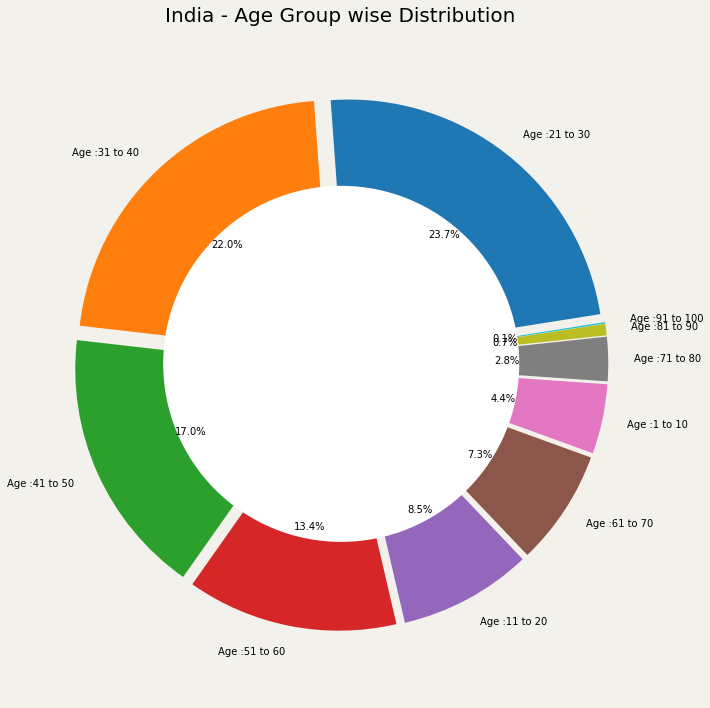

In [263]:
labels = list(age_analysis['Bins'])
sizes = list(age_analysis['Count'])

explode = []

for i in labels:
    explode.append(0.05)
    
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#F2F1EB')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

#### *** In this pie chart :
- Using all the Raw Data containing Patient wise details
- Not considered all the data points which have no Age Bracket mentioned, as they are not usefull to us.
- Not considered all the datapoints whose Current Status is Migrated.
- *** Assumption : All the Hospitalised patients are recovering and not deceased
- Considering only the  Patients whose Nationality is Indian
- Considering 'Blank' Nationality as Indian 

In [242]:
# Collecting all the Raw data from the API : Consdering all the patients till now
# Below is the list of URLs of the raw data (as on 31st July) [Need to update this manually] :
listy6 = ['https://api.covid19india.org/csv/latest/raw_data1.csv',
          'https://api.covid19india.org/csv/latest/raw_data2.csv',
          'https://api.covid19india.org/csv/latest/raw_data3.csv',
          'https://api.covid19india.org/csv/latest/raw_data4.csv',
          'https://api.covid19india.org/csv/latest/raw_data5.csv',
          'https://api.covid19india.org/csv/latest/raw_data6.csv',
          'https://api.covid19india.org/csv/latest/raw_data7.csv',
          'https://api.covid19india.org/csv/latest/raw_data8.csv',
          'https://api.covid19india.org/csv/latest/raw_data9.csv',
          'https://api.covid19india.org/csv/latest/raw_data10.csv',
          'https://api.covid19india.org/csv/latest/raw_data11.csv',
          'https://api.covid19india.org/csv/latest/raw_data12.csv' ]

# df_final would contain all raw data into one dataframe
df_final = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')

# for loop for merging all the raw data into one data frame : df_final
for i in range(1,len(listy6)) :
    b =  pd.read_csv(listy6[i])
    df_final = pd.concat([df_final,b])

#Manipulating df_final

#removing unwanted olumns from df_final
df_final = df_final.loc[:, ['Entry_ID','Patient Number','Age Bracket','Current Status','Nationality']]

# Droping Null Values from Age Column
df_final.dropna(subset=['Age Bracket'],inplace = True)
df_final.reset_index(inplace = True, drop = True)  

# Also dropping rows having non-numeric values in  Age column
indexNames = df_final[pd.to_numeric(df_final['Age Bracket'], errors='coerce').isnull()].index
df_final.drop(indexNames , inplace=True)
df_final['Age Bracket'] = df_final['Age Bracket'].astype(float)

# Considering only those cases where Current Status is Deceased or Recovered
indexNames = df_final[(df_final['Current Status'] != 'Deceased') & (df_final['Current Status'] != 'Recovered') & (df_final['Current Status'] != 'Hospitalized')].index
df_final.drop(indexNames , inplace=True)

# *** Assumption : All the Hospitalised patients are recovering and not deceased
conversion = lambda x: 'Recovered' if x == 'Hospitalized' else x
df_final['Current Status'] = df_final['Current Status'].apply(conversion)

# Considering only those cases where Nationality is India or Blank (**Considering Blank means Indian)
indexNames = df_final[(df_final['Nationality'] != 'India') & (df_final['Nationality'].notna())].index
df_final.drop(indexNames, inplace=True)


In [254]:
# Creating Data for the Pie Chart
# Creating Bins for Age Column
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels=['1 to 10','11 to 20','21 to 30','31 to 40','41 to 50','51 to 60','61 to 70','71 to 80','81 to 90','91 to 100']
df_final['Count'] = pd.cut(df_final['Age Bracket'], bins=bins, labels=labels)

#Counting the number of values in each bin, created a new dataframe
age_analysis = pd.DataFrame(df_final['Count'].value_counts())
age_analysis['Bins'] = age_analysis.index
age_analysis.reset_index(inplace = True, drop = True) 

age_analysis['Bins'] = age_analysis['Bins'].apply(lambda x: 'Age :'+x)

In [256]:
age_analysis

,Count,Bins
0,25471,Age :21 to 30
1,23721,Age :31 to 40
2,18351,Age :41 to 50
3,14424,Age :51 to 60
4,9123,Age :11 to 20
5,7907,Age :61 to 70
6,4763,Age :1 to 10
7,3019,Age :71 to 80
8,780,Age :81 to 90
9,92,Age :91 to 100


In [248]:
# Creating Patient_Status dataframe as per the age bin 

# Using Groupby to collect data of 'Recovered' & 'Deceased' patients
Patient_Status_Counts = df_final.groupby(['Count','Current Status']).count()
Patient_Status_Counts = Patient_Status_Counts.loc[:, ['Entry_ID']]
Patient_Status_Counts.rename(columns={"Entry_ID": "Count"}, inplace = True)
Patient_Status_Counts['Status'] = Patient_Status_Counts.index
Patient_Status_Counts.reset_index(inplace = True, drop = True) 

Patient_Status_Counts['Bins'],Patient_Status_Counts['Current Status'] = "",""

j=0
for i in Patient_Status_Counts['Status'] :
    Patient_Status_Counts['Bins'][j],Patient_Status_Counts['Current Status'][j] = i
    j+=1
    
Patient_Status_Counts.drop(columns=['Status'], inplace = True)

Patient_Status_Counts['Subgroup_Names'] = ''
for i in range(len(Patient_Status_Counts)) :
    Patient_Status_Counts['Subgroup_Names'][i] = Patient_Status_Counts['Bins'][i]+"_"+Patient_Status_Counts['Current Status'][i]

# In listy8 we have count of 'Recovered' & 'Deceased' patient's counts - Age Range Wise
subgroup_size_tot = []
subgroup_names_tot = []
for i in age_analysis['Bins']:
    for j in Patient_Status_Counts['Subgroup_Names'] : 
        k = j.split('_')
        if i == k[0]:
            a = Patient_Status_Counts[Patient_Status_Counts['Subgroup_Names'] == j]['Count'].values
            subgroup_size_tot.append(a[0]) 
            subgroup_names_tot.append(j)

In [249]:
# Now we have the data ready for Pie Chart
Patient_Status_Counts

,Count,Bins,Current Status,Subgroup_Names
0,12,1 to 10,Deceased,1 to 10_Deceased
1,4651,1 to 10,Recovered,1 to 10_Recovered
2,24,11 to 20,Deceased,11 to 20_Deceased
3,8871,11 to 20,Recovered,11 to 20_Recovered
4,93,21 to 30,Deceased,21 to 30_Deceased
5,24870,21 to 30,Recovered,21 to 30_Recovered
6,239,31 to 40,Deceased,31 to 40_Deceased
7,22945,31 to 40,Recovered,31 to 40_Recovered
8,520,41 to 50,Deceased,41 to 50_Deceased
9,17452,41 to 50,Recovered,41 to 50_Recovered


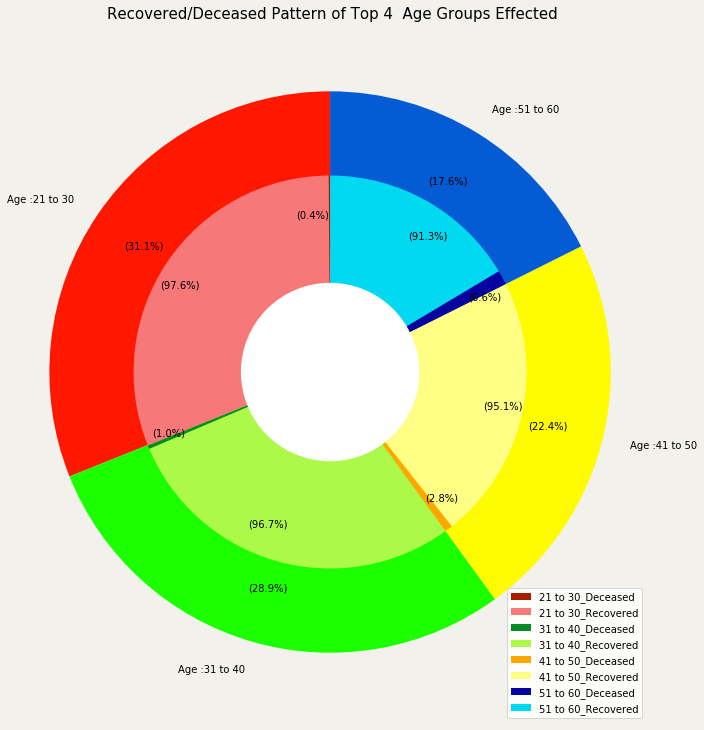

In [262]:
#Calculating Percentage values for the Sub-group pie-chart
sublabel_names = []

#For Better Visualisation we are considering only the Top 4 age groups which are mostly effected by COVID
subgroup_size=subgroup_size_tot[:8]
group_size = list(age_analysis['Count'][:4])
j=0
for i in range(len(subgroup_size)) : 
    x = subgroup_size[i]/group_size[j] * 100
    sublabel_names.append("({:.1f}%)".format(x))
    #sublabel_names.append(subgroup_size[i]/group_size[j] * 100)
    if i > 0 and i%2 != 0 :
        j = j + 1

fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#F2F1EB')

#Data
names = age_analysis['Bins']
group_names = names = age_analysis['Bins'][:4]
#group_names = ['Age : 51-60','Age : 61-70','Age : 41-50','Age : 71-80']
#subgroup_names = ['Deceased', 'Recovered', 'Deceased', 'Recovered', 'Deceased', 'Recovered', 'Deceased', 'Recovered']


#Colors Definition
colors = ['#FF1700','#1CFF00','#FFFB00','#055BD3'] #Red, Green, Yellow, Blue
colors_subgroup = ['#AB1D00','#F77878','#078A25','#ADF94A','#FFA600','#FFFF86','#0603A1','#01D9F1'] 
#Maroon, Pink, Dark Green, Light Green, Orange, Lemon Yellow, Navy Blue, Sky Blue

#Function for autopct (% for Outer circle)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "({:.1f}%)".format(pct, absolute)

# Building Outer Circle
b_wedges, b_texts, junk = plt.pie(group_size, wedgeprops=dict(width=1.0), colors=colors,labels = group_names,
                 startangle=90, frame=True, autopct=lambda pct: func(pct, group_size),pctdistance=0.8, labeldistance=1.1)
    
# Building Inner Circle
s_patches, s_texts = plt.pie(subgroup_size, 
                  colors=colors_subgroup, radius=0.7,
                  startangle=90, labeldistance=0.8, labels = sublabel_names)


centre_circle = plt.Circle((0,0), 0.3, color='white', linewidth=10)

# Building Legend Box
plt.legend(s_patches, subgroup_names_tot[:8], loc="lower right", fontsize = 'medium',facecolor = '#FFFFFF')


#Makes the chart doughnut
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.title('Recovered/Deceased Pattern of Top 4  Age Groups Effected',fontsize = 15)

plt.show()

#To do 
# Collect all raw data into one

## We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 18.5% of people >60 are affected.

In [22]:
# These sheet contains details of covid cases - date wise of each country.
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [23]:
#Trying to display all the columns.
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(confirmed_df.head(3))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615


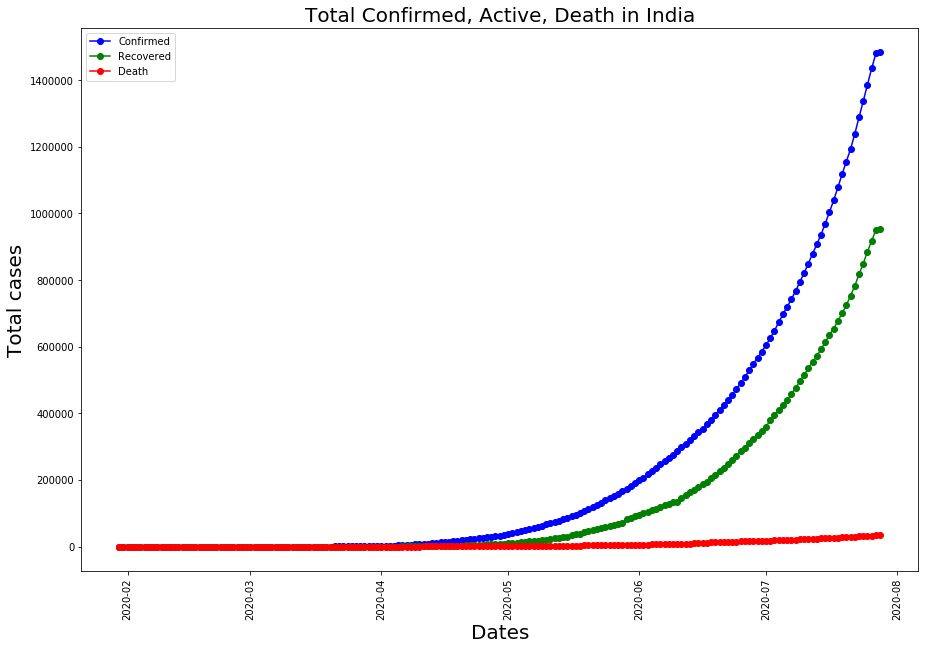

In [24]:
confirmed_df[confirmed_df['Country/Region'] == 'India']

dates = list(confirmed_df.columns[4:]) #Creating a list of dates
dates = list(pd.to_datetime(dates)) #Converting it into Date/Time format
dates_india = dates[8:] #Removing first 8 days from this list, because in India, First case was reported on 30th Jan 2020
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
fig.set_facecolor('#F2F1EB')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

#### From the above Graph it can be infered that there has been a steep rise in Confirmed cases starting mid-may.
We also show good progress in Recovered cases starting June

### Total Samples Tested

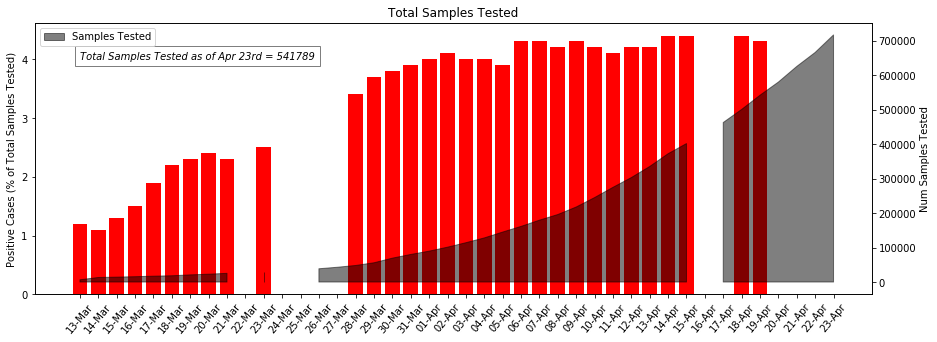

In [25]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
fig.set_facecolor('#F2F1EB')
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
plt.xticks(rotation = '50') 
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
          bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');
plt.xticks(rotation = '50') 
plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()

Red Bar is Percent_positive cases date wise, which is increasing day by day.    
Superimposed on this is that Black graph representing the Number of Samples Tested.

## Testing LIVE Status

In [26]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json') #Perfectly Updated Data

# get contents from the response"
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail(2)

# Converting 'updatedon' column to Datetime format
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

# save file as a .csv file (Original File)
tested.to_csv('updated_tests_latest_state_level.csv', index=False)

In [27]:
#Getting the lastest data :
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')
state_test_cases = state_test_cases.apply(pd.to_numeric)

state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Karnataka,999530,65798000,8.61,99,9.93,97821
Andhra Pradesh,996573,52221000,7.33,94,9.77,nan
Maharashtra,995343,122153000,9.07,9,9.78,nan
Rajasthan,987272,77264000,2.88,49,9.97,nan
Haryana,99987,28672000,5.91,87,9.66,52646
Jharkhand,99931,37403000,3.51,99,7.29,99641
Kerala,99692,35125000,3.38,83,9.89,992
Madhya Pradesh,99677,82232000,9.77,28,8.81,nan
Goa,99234,1540000,4.17,99,9.6,981


# Ways to convert to datetime

In [6]:
df_India

,State/UnionTerritory,Active,Cured,Deaths,Total,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,557,263,10,557,2020-08-08,11.7401,92.6586
1,Andhra Pradesh,76377,88672,1537,76377,2020-08-08,15.9129,79.7400
2,Arunachal Pradesh,692,1063,3,692,2020-08-08,28.2180,94.7278
3,Assam,11738,33428,109,11738,2020-08-08,26.2006,92.9376
4,Bihar,20770,38228,330,20770,2020-08-08,25.0961,85.3131
5,Chandigarh,434,706,19,434,2020-08-08,30.7333,76.7794
6,Chhattisgarh,2462,7256,61,2462,2020-08-08,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,412,860,2,412,2020-08-08,20.1809,73.0169
8,Delhi,10207,124254,4021,10207,2020-08-08,28.7041,77.1025
9,Goa,1884,4876,56,1884,2020-08-08,15.2993,74.1240


## Day-by-Day Confirmed Cases in Top 15 States in India & Total 


In [7]:
# Creating a list of the Top 15 effected states from df_India
df_India.sort_values(by='Total', ascending=False, inplace = True)
lsty1 = ['Date','Status','Total']
lsty1.extend(df_India['State/UnionTerritory'][:15].tolist())

# Collecting time-series data of State-wise cases
state_wise_cases_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

# Working on this sheet
# Converting Column Names as per State Names
states_abb = {'TT':'Total','AN' : 'Andaman and Nicobar Islands','AP':'Andhra Pradesh','AR':'Arunachal Pradesh','AS':'Assam','BR':'Bihar',
              'CH':'Chandigarh','CT' : 'Chhattisgarh','DN':'Dadra and Nagar Haveli','DD':'Daman and Diu','DL':'Delhi', 'GA':'Goa',
              'GJ':'Gujarat','HR':'Haryana','HP':'Himachal Pradesh','JK':'Jammu and Kashmir','JH':'Jharkhand','KA':'Karnataka',
              'KL':'Kerala','LA':'Ladakh','LD':'Lakshadweep','MP':'Madhya Pradesh','MH':'Maharashtra','MN':'Manipur',
              'ML':'Meghalaya','MZ':'Mizoram','NL':'Nagaland','OR':'Odisha','PY':'Puducherry','PB':'Punjab','RJ':'Rajasthan','SK':'Sikkim',
              'TN':'Tamil Nadu','TR':'Tripura','UT':'Uttarakhand','UP':'Uttar Pradesh','WB':'West Bengal','TG': 'Telangana'  
           }

# Renaming Column names to tally from the list
for i in state_wise_cases_df.columns:
    if i in states_abb.keys() :
        state_wise_cases_df.rename(columns = {i:states_abb[i]}, inplace = True) 
        
# Making another df as per requirement
state_top = state_wise_cases_df[lsty1]

# Considering only Confirmed Cases for this Chart
state_top = state_top[state_top['Status'] == 'Confirmed']    

# Reseting the Index
state_top.reset_index(inplace = True, drop = True) 

# Adding Cumulative_Confirmed_Cases for all States, to know how many people have been effected by COVID till now in this state
for i in range(2,18):
    state_top['CCM_'+state_top.columns[i]] = state_top[state_top.columns[i]].cumsum()

state_top['Date'] = pd.to_datetime(state_top['Date'])    

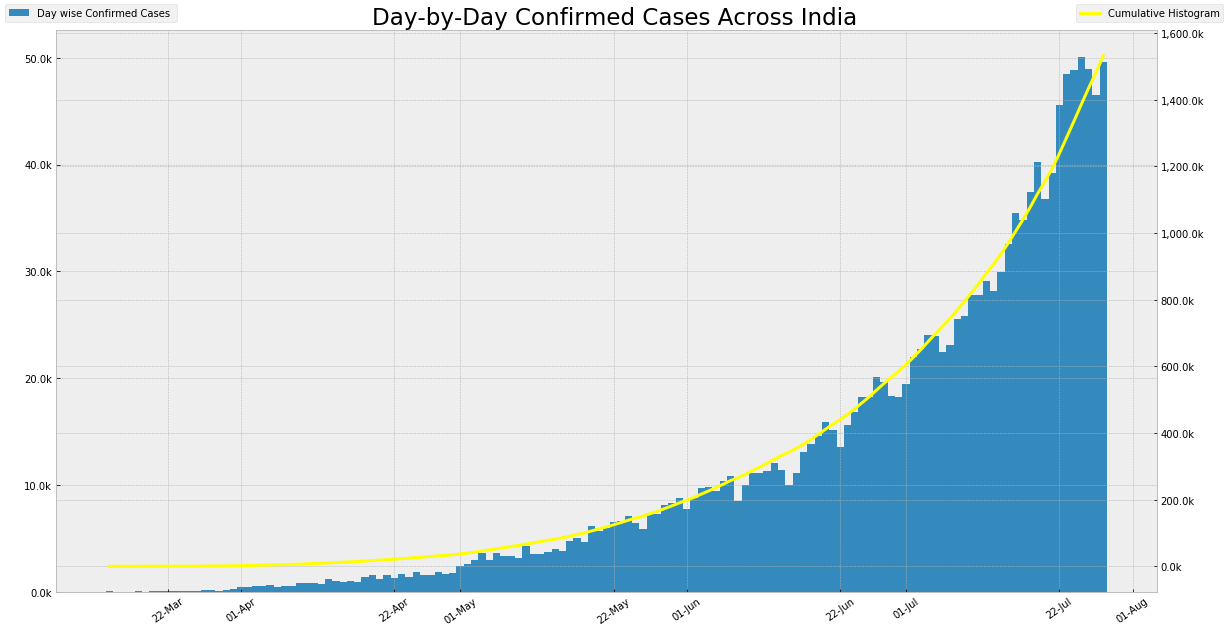

In [33]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize= (17,17))
fig.set_facecolor('#F2F1EB')
plt.suptitle('Day-by-Day Confirmed Cases Across India',fontsize = 23,y=1.0)
plt.style.use('bmh')

for i in range(2,3):
    x=state_top['Date']
    y=state_top[lsty1[i]]
    ax = fig.add_subplot(2,1.5,i-1) 
    ax.bar(x, y,width = 1,label = 'Day wise Confirmed Cases ')
    ax_bis = ax.twinx()
    ax_bis.plot(x, state_top['CCM_'+ lsty1[i]], color='yellow',markerfacecolor='None',
                 linestyle='solid',linewidth =3, markersize = 0.5, label = "Cumulative Histogram" )

    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))
    ax_bis.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.tick_params(axis='x', rotation=35)
    
    handles, labels = ax.get_legend_handles_labels()
    handles1, labels1 = ax_bis.get_legend_handles_labels()
    fig.legend(handles,labels, loc='upper left')
    fig.legend(handles1,labels1, loc='upper right')
    plt.tight_layout(pad=2.2)

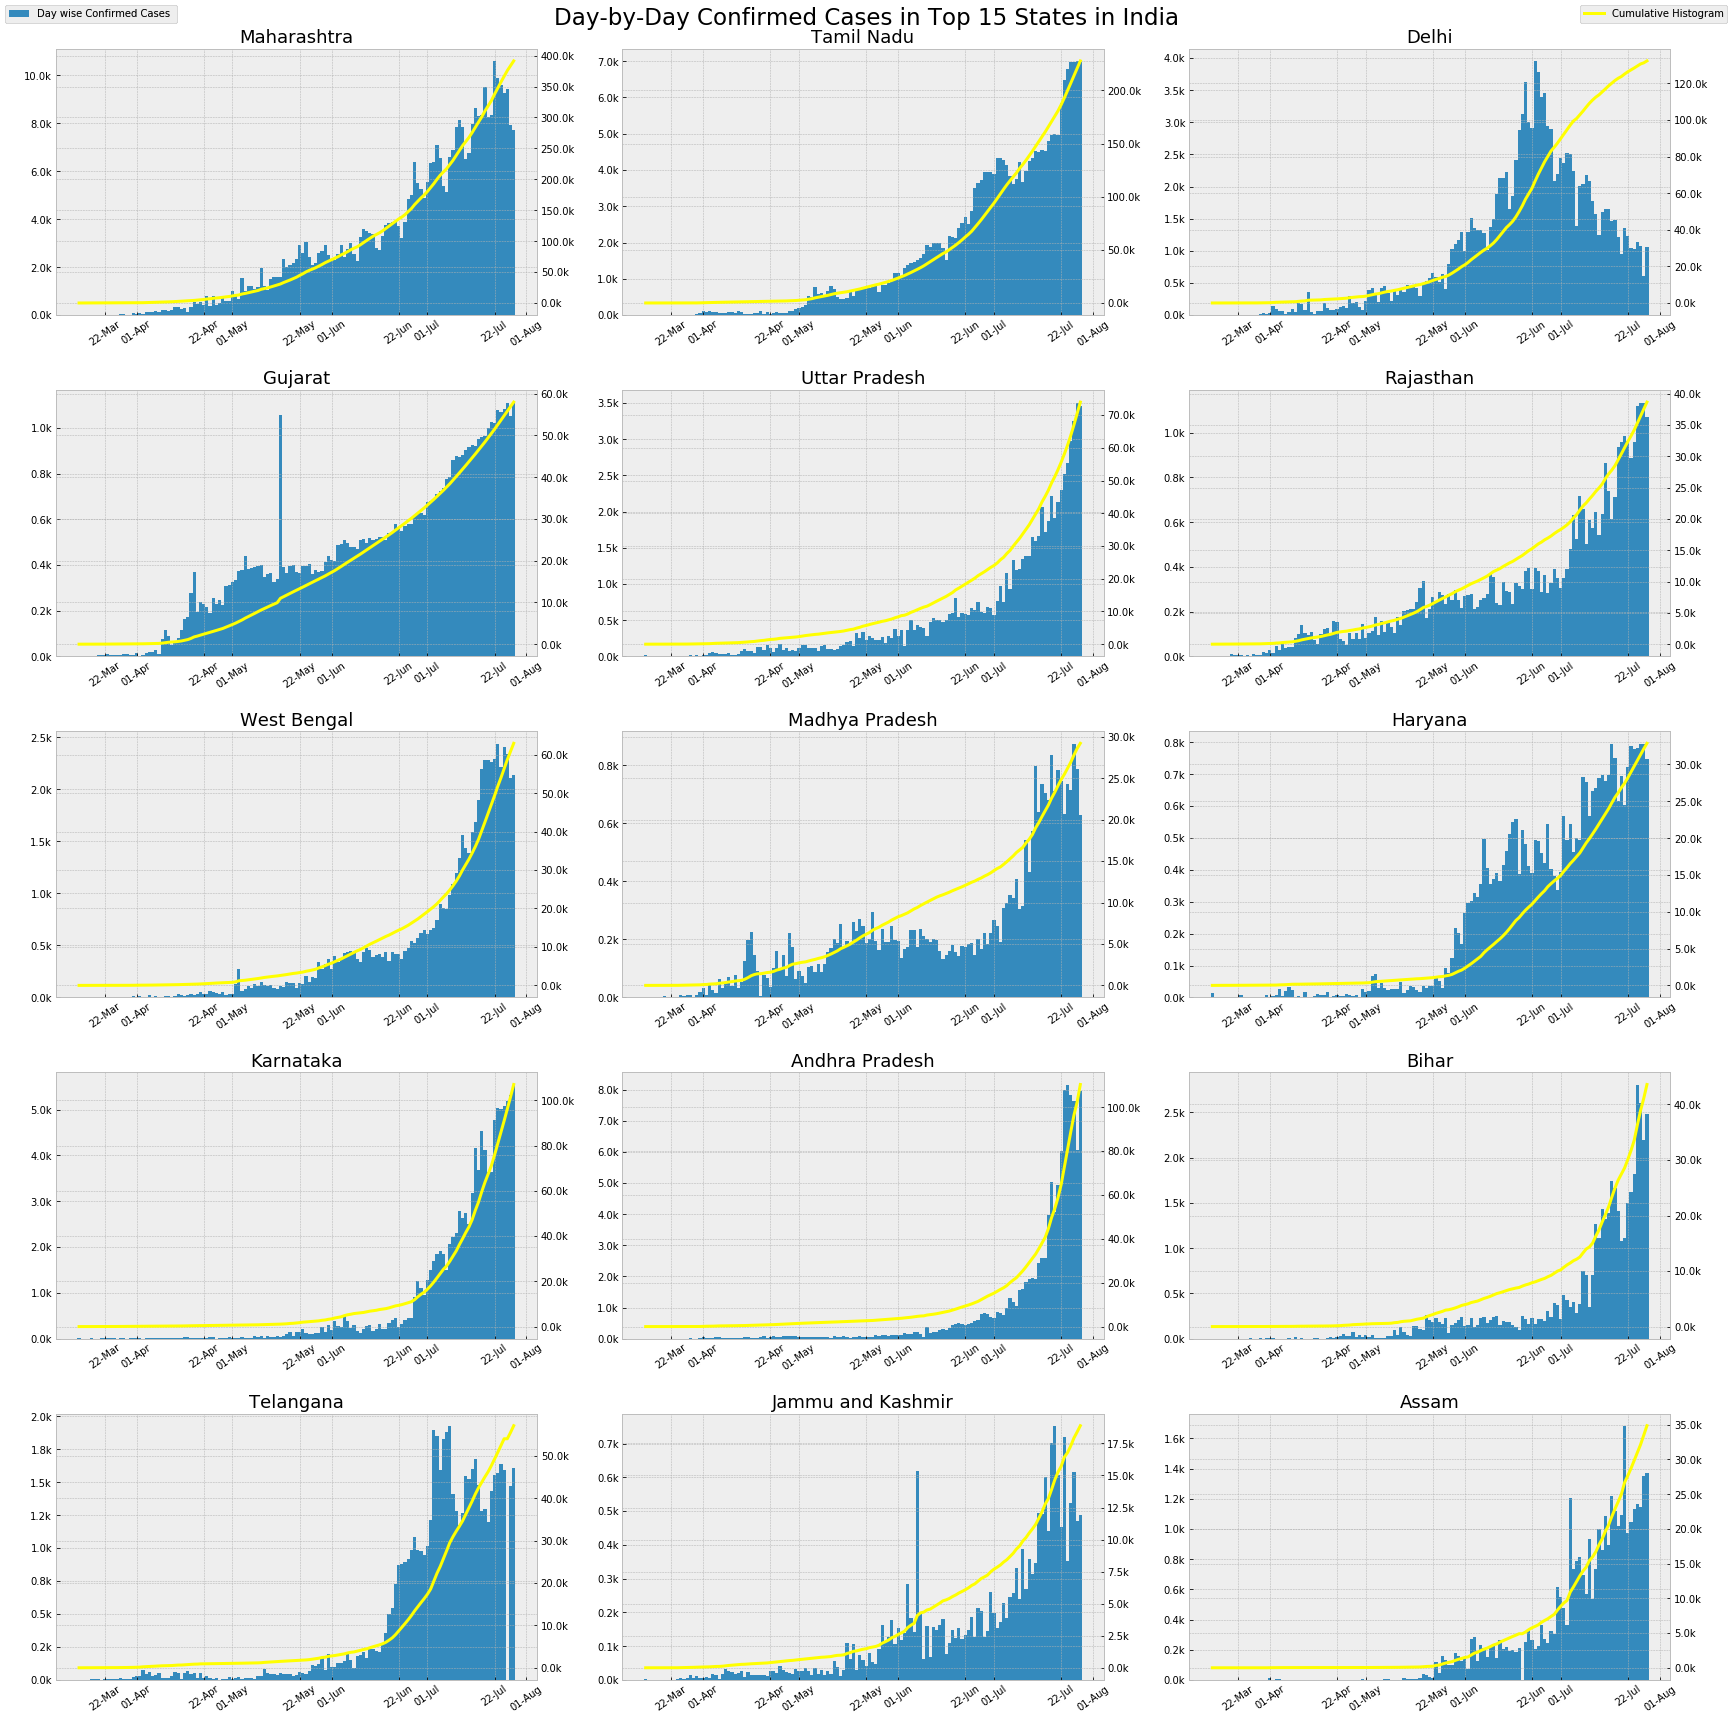

In [34]:
fig = plt.figure(figsize= (24,24))
fig.set_facecolor('#F2F1EB')
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 23,y=1.0)
plt.style.use('bmh')

for i in range(3,18):
    x=state_top['Date']
    y=state_top[lsty1[i]]
    ax = fig.add_subplot(5,3,i-2) 
    ax.bar(x, y,width = 1,label = 'Day wise Confirmed Cases ')
    ax_bis = ax.twinx()
    ax_bis.plot(x, state_top['CCM_'+ lsty1[i]], color='yellow',markerfacecolor='None',
                 linestyle='solid',linewidth =3, markersize = 0.5, label = "Cumulative Histogram" )

    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))
    ax_bis.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.tick_params(axis='x', rotation=35)
    
    plt.title(lsty1[i],fontsize = 18)
    handles, labels = ax.get_legend_handles_labels()
    handles1, labels1 = ax_bis.get_legend_handles_labels()
    fig.legend(handles,labels, loc='upper left')
    fig.legend(handles1,labels1, loc='upper right')
    plt.tight_layout(pad=2.2)

We can infer clearly from the above charts that clearly the Flattening of the curve has not started in any of the Top 15 affected states. We can see that the curve has started to gradually flatten (but it might be because of many other reasons like not reporting the actual cases etc.) 
#There is a sudden steep increase in Andhra Pradesh, UP, Karnataka (clearly bcz lockdown was opened)
Maharashtra having high cases right from the start

### Growth Rate in top 15 States in India

In [233]:
#Preapring Data for Growth Rate Chart
states_cases = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

# Converting 'Date' column to Datetime format
states_cases['Date'] = pd.to_datetime(states_cases['Date'])

#Removing unwanted columns, we need only Confirmed column for this Chart
states_cases = states_cases.loc[:, ['Date','State','Confirmed']]


#We already have prepared lsty1 containing the top 15 states effected by COVID
#lsty1[3:]

# Function to calculate the Growth rate 
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        rate_percent = ((values[i]-values[i-1])/values[i-1])*100
        k.append(int(rate_percent))
    return k


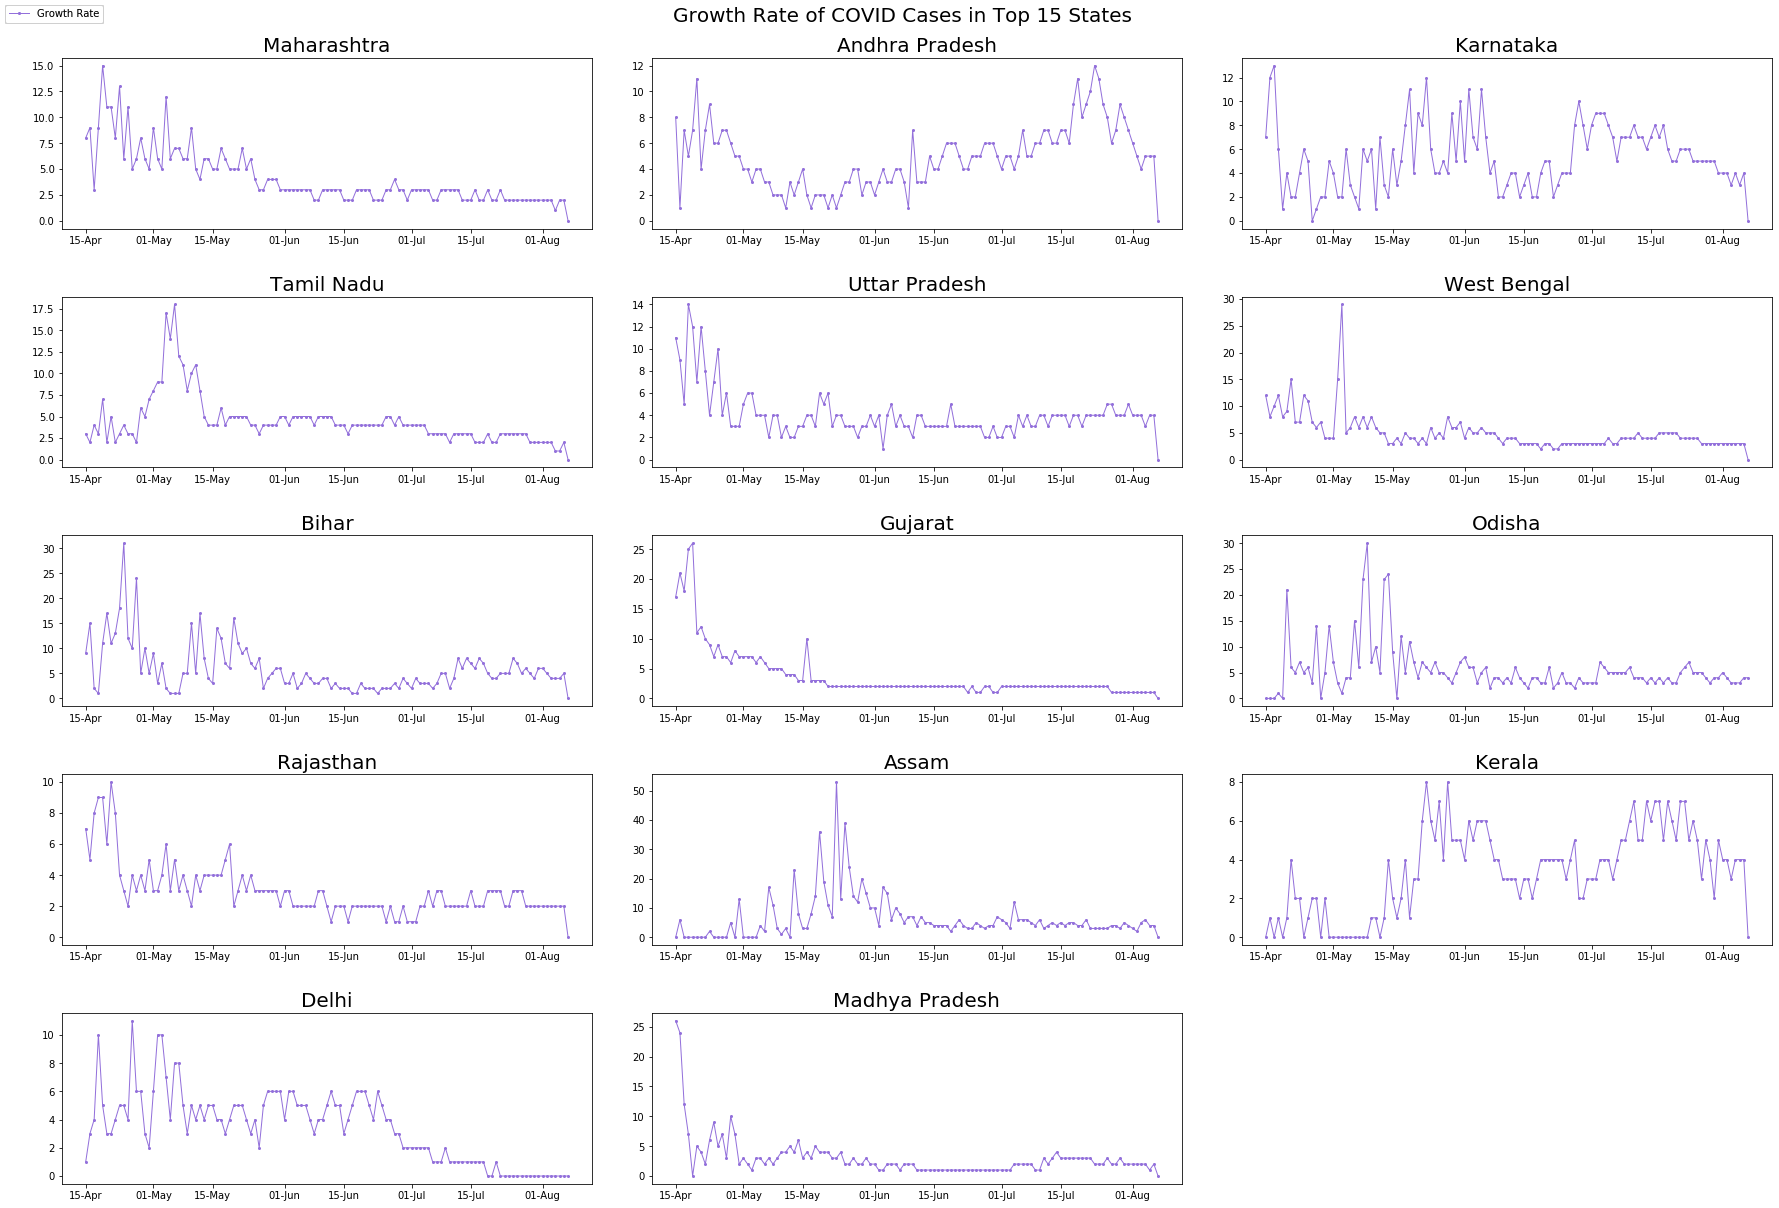

In [235]:
fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate of COVID Cases in Top 15 States',fontsize = 20,y=1.0)

#Loop Starts here ---
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    #Data Preparation : k here contains the State's name we are working in this chart
    k = lsty1[i+2]
    
    # df_k contains data of only one state - k
    df_k = states_cases.loc[states_cases['State'] == k]
    df_k.reset_index(inplace = True, drop = True)  
    df_k.sort_values('Date', ascending=True,inplace = True) #Making sure data is ascending order as per date

    #Calculating Growth Rate of this State 
    listy6 = calc_growthRate(list(df_k['Confirmed']))

    #Growth Rate at Day 1 will be 0, hence Inserted 0 at First 
    listy6.insert(0,0)
    #Adding this as a column in the df_i
    df_k['Growth_Rate_%'] = listy6

    #While plotting considering data post 15-04-2020, as the COVID cases started to increase post that :
    a = int(df_k[(df_k['Date'] == '15-04-2020')].index.values)
    df_k = df_k.loc[a:]
    ax.plot_date(df_k['Date'],df_k['Growth_Rate_%'],color = '#9370db',label = 'Growth Rate',linewidth =1,linestyle='-',markersize=2)
    plt.title(k,fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
plt.tight_layout(pad=3.0)

In Many states the Growth is stablising, but in states like AP, Karnataka, Kerela (SI states are worsening) the cases are still increasing day by day.

### Exploring different types of medical facilities available in India during lockdown

In [196]:
#Preparing data for this chart
medical_facilites = states_cases = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')

# Dropping not usefull columns for this chart
medical_facilites = medical_facilites.loc[:, ['Updated On','State','Num Isolation Beds','Num ICU Beds','Num Ventilators']]

# Converting 'updatedon' column to Datetime format
medical_facilites['Updated On'] = pd.to_datetime(medical_facilites['Updated On'], format='%d/%m/%Y') #Make sure to Specify format

new_row = dict()

#This dataframe would contain the data for Chart
df_final = pd.DataFrame(columns=['State','Num Isolation Beds','Num ICU Beds','Num Ventilators'])

#list99 contains the list of States highly effected by Corona

for j in range(0,len(list99)) :
    k = list99[j] #k is the State currently working in this loop
    new_row['State'] = k

    #df_k contains only Maharashtra data
    df_k = medical_facilites.loc[medical_facilites['State'] == k]
    df_k['Updated On'] = pd.to_datetime(df_k['Updated On'], format='%d/%m/%Y')
    
    #Sorting by Date
    df_k.sort_values('Updated On', ascending=False,inplace = True) #Making sure data has the latest data on top
    df_k.reset_index(inplace = True, drop = True) 
    
    colms = df_k.columns[2:]

    for i in colms :
        # Gathering data for i State - Dictionary
        inde = df_k[i].notna().idxmax()
        new_row[i] = df_k.loc[ inde,i]
        #print(inde)
    df_final = df_final.append(new_row, ignore_index=True)

In [197]:
# Many States have not provided data regarding Number of Medical Facilits - purely a data issue, 
#so we are not considering those states
df_final.dropna(inplace = True)
df_final.reset_index(inplace = True, drop = True) 

In [198]:
df_final

,State,Num Isolation Beds,Num ICU Beds,Num Ventilators
0,Andhra Pradesh,21254.0,2680.0,330.0
1,Assam,4232.0,424.0,265.0
2,Bihar,2344.0,116.0,50.0
3,Chhattisgarh,3336.0,522.0,280.0
4,Haryana,34876.0,2103.0,1051.0
5,Karnataka,196112.0,2075.0,999.0
6,Madhya Pradesh,35840.0,873.0,558.0
7,Maharashtra,40214.0,7235.0,3096.0
8,Meghalaya,3813.0,29.0,32.0
9,Nagaland,862.0,68.0,51.0


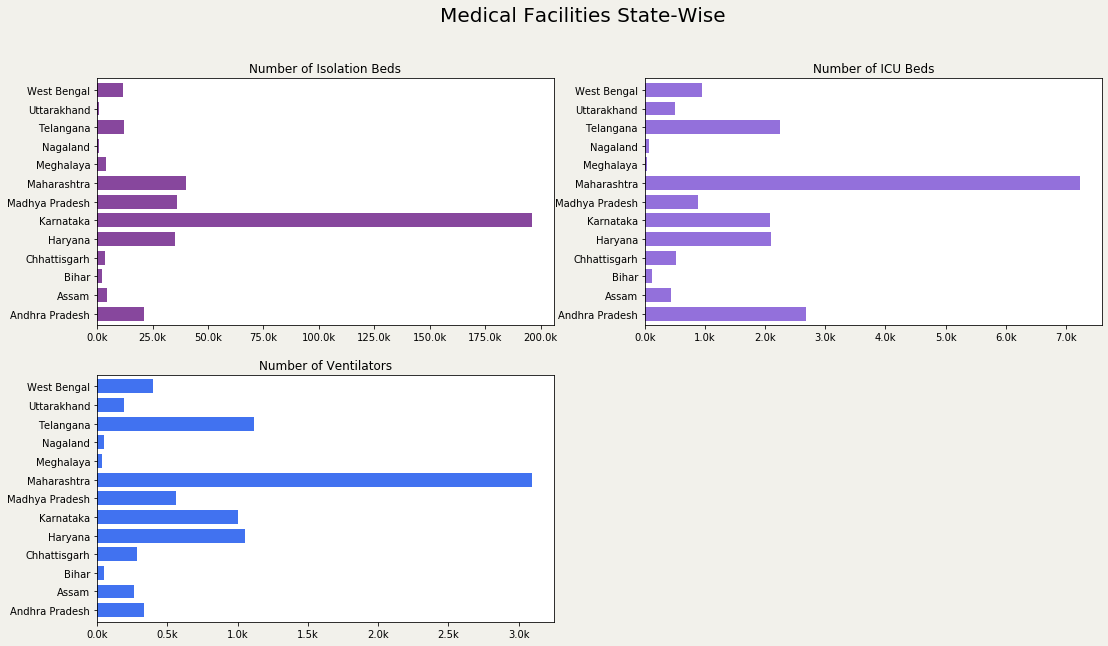

In [199]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(17,10))
plt.suptitle('Medical Facilities State-Wise',fontsize=20)
fig.set_facecolor('#F2F1EB')


plt.subplot(221)
plt.title('Number of Isolation Beds')
#plt.barh(df_final['State'],df_final['Num Isolation Beds'],color ='#87479d');
ax = df_final['Num Isolation Beds'].plot(kind='barh', figsize=(18, 10), color='#87479d', zorder=1.5, width=0.75) 
ax.set_yticklabels(list(df_final['State']))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))

plt.subplot(222)
plt.title('Number of ICU Beds')
ax = df_final['Num ICU Beds'].plot(kind='barh', figsize=(18, 10), color='#9370db', zorder=1.5, width=0.75) 
ax.set_yticklabels(list(df_final['State']))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))

plt.subplot(223)
plt.title('Number of Ventilators')
ax = df_final['Num Ventilators'].plot(kind='barh', figsize=(18, 10), color='#4172F0', zorder=1.5, width=0.75) 
ax.set_yticklabels(list(df_final['State']))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))


### Exploring Statewise Testing Insights

In [176]:
#Preparing data for this chart
medical_facilites = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
medical_facilites['Updated On'] = pd.to_datetime(medical_facilites['Updated On'], format='%d/%m/%Y')

#Keeping only required columns
medical_facilites = medical_facilites.loc[:, ['Updated On','State','Total Tested','Positive']]

#Extracting only the Aug Data for Simplification
aug_data = medical_facilites[medical_facilites['Updated On'].dt.strftime('%Y-%m') == '2020-08']

#Sorting Data by Date
aug_data.sort_values(by='Updated On', ascending=False, inplace = True)

#Grouping Data by State and extracting the first values, this is our data that will be used for Chart
df_final = aug_data.groupby('State').first().reset_index()


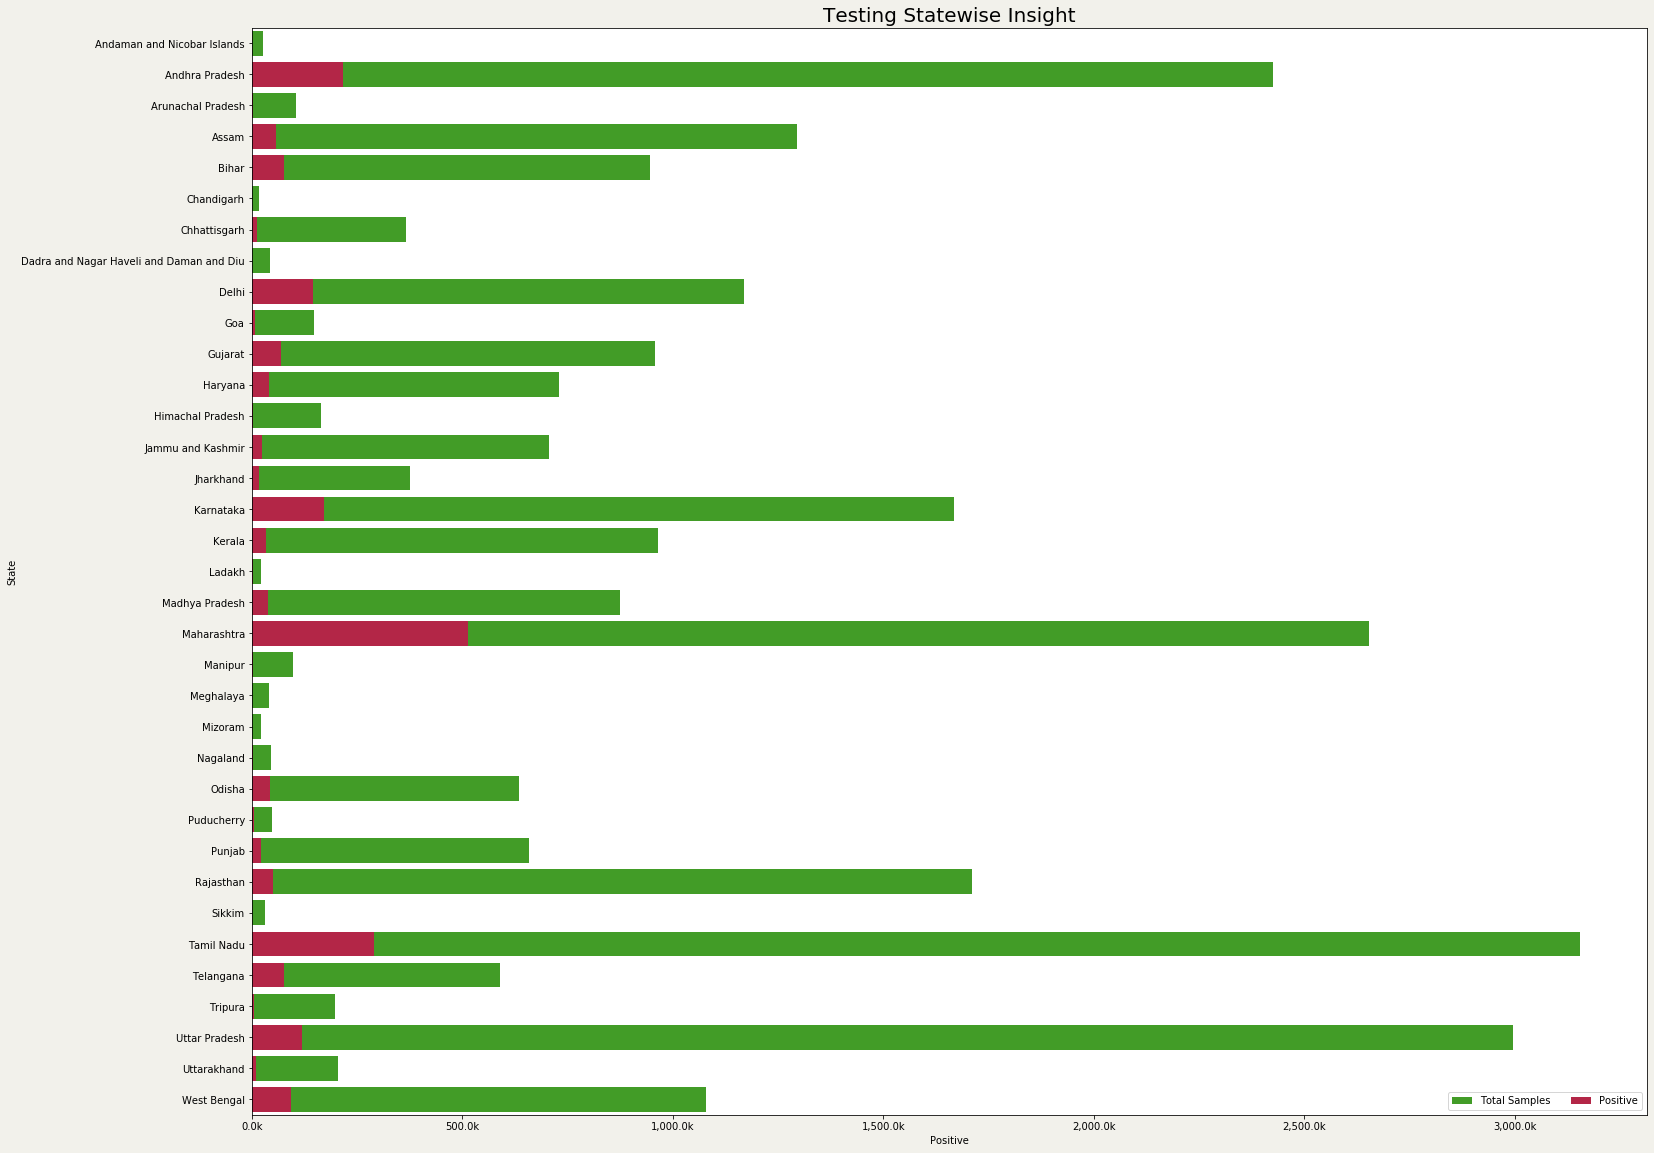

In [194]:
fig = plt.figure(figsize=(25,20))
fig.set_facecolor('#F2F1EB')
sns.set_color_codes("pastel")
ax = sns.barplot(x=df_final['Total Tested'], y= df_final['State'],label="Total Samples", color = '#38AF14')
ax1 = sns.barplot(x=df_final['Positive'], y=df_final['State'],label='Positive', color='#CA0F3A')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'k'))
plt.title('Testing Statewise Insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True)


### Number of ICMR Testing Centres in each state